In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load dataset
df = pd.read_excel('../dataKasus-1.xlsx')

# Menampilkan informasi umum tentang dataset
df.info()

# Menampilkan 5 baris pertama dari dataset
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 561 entries, 0 to 560
Data columns (total 13 columns):
 #   Column                            Non-Null Count  Dtype 
---  ------                            --------------  ----- 
 0   NO                                561 non-null    int64 
 1   NAMA                              561 non-null    object
 2   USIA                              558 non-null    object
 3   PARITAS                           561 non-null    int64 
 4   JARAK KELAHIRAN                   554 non-null    object
 5   RIW HIPERTENSI                    561 non-null    object
 6   RIW PE                            561 non-null    object
 7   OBESITAS                          561 non-null    object
 8   RIW DM                            561 non-null    object
 9   RIW HIPERTENSI/PE DALAM KELUARGA  561 non-null    object
 10  SOSEK RENDAH                      561 non-null    object
 11  PE/Non PE                         561 non-null    object
 12  Unnamed: 12           

,NO,NAMA,USIA,PARITAS,JARAK KELAHIRAN,RIW HIPERTENSI,RIW PE,OBESITAS,RIW DM,RIW HIPERTENSI/PE DALAM KELUARGA,SOSEK RENDAH,PE/Non PE,Unnamed: 12
0,1,NAMA 1,23 TH,3,< 2 tahun,Tidak,Tidak,Tidak,Ya,Tidak,>UMR,Non PE,NaN
1,2,NAMA 2,29 TH,2,< 2 tahun,Tidak,PEB,Tidak,Tidak,Ada,>UMR,PE,NaN
2,3,NAMA 3,20 TH,1,anak pertama,Tidak,Tidak,Tidak,Tidak,Tidak,>UMR,Non PE,NaN
3,4,NAMA 4,18 TH,1,anak pertama,Tidak,Tidak,Tidak,Tidak,Tidak,>UMR,Non PE,NaN
4,5,NAMA 5,34 TH,3,> 2 tahun,Tidak,Tidak,Tidak,Tidak,Tidak,>UMR,Non PE,NaN


In [4]:
df.columns

Index(['NO', 'NAMA', 'USIA', 'PARITAS', 'JARAK KELAHIRAN', 'RIW HIPERTENSI',
       'RIW PE', 'OBESITAS', 'RIW DM', 'RIW HIPERTENSI/PE DALAM KELUARGA',
       'SOSEK RENDAH', 'PE/Non PE', 'Unnamed: 12'],
      dtype='object')

In [5]:
# Cek tipe data dari kolom USIA
df['USIA'].dtype

# Jika kolom ternyata berisi tipe data string atau objek, lakukan konversi
df['USIA'] = pd.to_numeric(df['USIA'], errors='coerce')

# Cek apakah ada nilai yang tidak bisa dikonversi
df['USIA'].isnull().sum()

# Drop nilai yang null atau handle sesuai kebutuhan
df = df.dropna(subset=['USIA'])

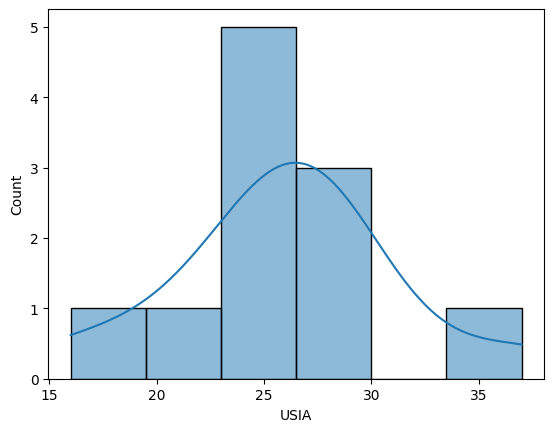

In [6]:
sns.histplot(df['USIA'], kde=True)
plt.show()

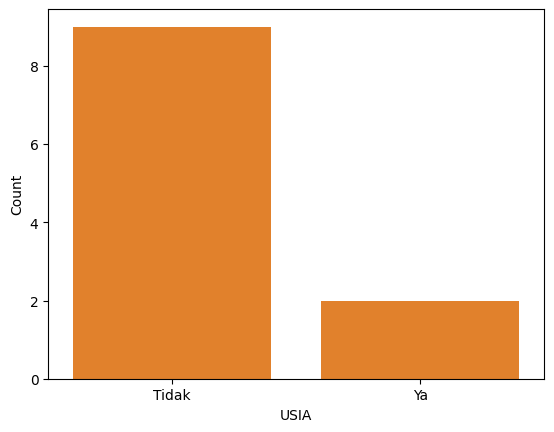

In [8]:
# Statistik deskriptif
df.describe()

# Mengecek nilai yang hilang
df.isnull().sum()

# Menampilkan distribusi data untuk fitur utama seperti usia dan tekanan darah
sns.histplot(df['USIA'], kde=True)
sns.countplot(x='RIW HIPERTENSI', data=df)
plt.show()


In [10]:
# Membuat fitur baru berdasarkan riwayat kesehatan keluarga
df['RIW HIPERTENSI/PE DALAM KELUARGA'] = np.where(df['RIW HIPERTENSI/PE DALAM KELUARGA'] == 'Ya', 1, 0)

# Mengonversi variabel kategori menjadi numerik menggunakan one-hot encoding atau label encoding
df = pd.get_dummies(df, columns=['Faktor_Sosial_Ekonomi', 'Riwayat_Medis'], drop_first=True)


KeyError: "None of [Index(['Faktor_Sosial_Ekonomi', 'Riwayat_Medis'], dtype='object')] are in the [columns]"